In [ ]:
import math

# Basic Functions
def gimmelight(road1, road2, road3, road4):
  min_cycle_duration = 60  # Minimum cycle duration in seconds
  max_cycle_duration = 240  # Maximum cycle duration in seconds
  min_green_time = 60  # Minimum green time for any road

  waiting_cars_road1 = road1
  waiting_cars_road2 = road2
  waiting_cars_road3 = road3
  waiting_cars_road4 = road4

  # Calculate total waiting cars
  total_waiting_cars = (waiting_cars_road1 + waiting_cars_road2 + waiting_cars_road3 + waiting_cars_road4)

  if total_waiting_cars == 0:
      print("No cars waiting.")
  else:
      # Calculate cycle duration based on total waiting cars
      cycle_duration = max(min_cycle_duration,min(max_cycle_duration,(total_waiting_cars * min_cycle_duration / 100)))

      # Calculate green light times for each road
      green_time_road1 = max(
          (waiting_cars_road1 / total_waiting_cars) * cycle_duration,
          min_green_time
      )
      green_time_road2 = max(
          (waiting_cars_road2 / total_waiting_cars) * cycle_duration,
          min_green_time
      )
      green_time_road3 = max(
          (waiting_cars_road3 / total_waiting_cars) * cycle_duration,
          min_green_time
      )
      green_time_road4 = max(
          (waiting_cars_road4 / total_waiting_cars) * cycle_duration,
          min_green_time
      )
      return green_time_road1, green_time_road2, green_time_road3, green_time_road4, cycle_duration

In [ ]:
#@title # Enter the Traffic Data
road1 = 150 #@param {type:"integer"}
road2 = 50 #@param {type:"integer"}
road3 = 25 #@param {type:"integer"}
road4 = 75 #@param {type:"integer"}
#r1 and r3 are parallel
#r2 and r4 are parallel
green_time_road1, green_time_road2, green_time_road3, green_time_road4, cycle_duration = gimmelight(road1,road2,road3,road4)
speed_of_car=5.55 #in m/sec
length_of_car=2+1 #in meters
#number_of_cars_passing=speed_of_car*time/length_of_car

r1_total = road1
r1_right = math.ceil(r1_total*0.2)
r1_straight = r1_total - r1_right
r1_total_time = green_time_road1
r1_right_time = (r1_right/(r1_right + r1_straight))*r1_total_time
r1_straight_time=(r1_straight/(r1_right + r1_straight))*r1_total_time
r1_right_numcars= (speed_of_car*r1_right_time)/(2*length_of_car)
r1_straight_numcars= (speed_of_car*r1_straight_time)/(2*length_of_car)


r2_total = road2
r2_right = math.ceil(r2_total*0.2)
r2_straight = r2_total - r2_right
r2_total_time = green_time_road2
r2_right_time = (r2_right/(r2_right + r2_straight))*r2_total_time
r2_straight_time = (r2_straight/(r2_right + r2_straight))*r2_total_time
r2_right_numcars= (speed_of_car*r2_right_time)/(2*length_of_car)
r2_straight_numcars= (speed_of_car*r2_straight_time)/(2*length_of_car)

r3_total = road3
r3_right = math.ceil(r3_total*0.2)
r3_straight = r3_total - r3_right
r3_total_time = green_time_road3
r3_right_time = (r3_right/(r3_right + r3_straight))*r3_total_time
r3_straight_time = (r3_straight/(r3_right + r3_straight))*r3_total_time
r3_right_numcars= (speed_of_car*r3_right_time)/(2*length_of_car)
r3_straight_numcars= (speed_of_car*r3_straight_time)/(2*length_of_car)


r4_total = road4
r4_right = math.ceil(r4_total*0.2)
r4_straight = r4_total - r4_right
r4_total_time = green_time_road4
r4_right_time = (r4_right/(r4_right + r4_straight))*r4_total_time
r4_straight_time = (r4_straight/(r4_right + r4_straight))*r4_total_time
r4_right_numcars= (speed_of_car*r4_right_time)/(2*length_of_car)
r4_straight_numcars= (speed_of_car*r4_straight_time)/(2*length_of_car)

#choose between a pair either R1 & R3 or R2 & R4

total_cycle_time=0
total_cars=0

if abs(r1_total - r3_total)>abs(r2_total - r4_total):

    #now start with one of a pair R1& R3

    if r1_total>r3_total:
        print("R1 green for right and straight ",int(r1_right_time),"and number of cars will be ",int(r1_right_numcars+r1_straight_numcars*(r1_right_time/r1_straight_time)))
        print("R1 green for straight and R3 green for straight ", int(r1_straight_time-r1_right_time),"and number of cars will be ",int((r1_straight_numcars*((r1_straight_time-r1_right_time)/r1_straight_time))+r3_straight_numcars*((r1_straight_time-r1_right_time)/r3_straight_time)))
        print("R3 straight and right for ",int(max(r3_straight_time-(r1_straight_time-r1_right_time),r3_right_time)),"and number of cars will be ",int((r3_straight_numcars*(max(r3_straight_time-(r1_straight_time-r1_right_time),r3_right_time)/r3_straight_time))+(r3_right_numcars*(max(r3_straight_time-(r1_straight_time-r1_right_time),r3_right_time)/r3_right_time))))
        total_cycle_time+=r1_right_time+(r1_straight_time-r1_right_time)+max(r3_straight_time-(r1_straight_time-r1_right_time),r3_right_time)
        total_cars+=int(r1_right_numcars+r1_straight_numcars*(r1_right_time/r1_straight_time))+int((r1_straight_numcars*((r1_straight_time-r1_right_time)/r1_straight_time))+r3_straight_numcars*((r1_straight_time-r1_right_time)/r3_straight_time))+int((r3_straight_numcars*(max(r3_straight_time-(r1_straight_time-r1_right_time),r3_right_time)/r3_straight_time))+(r3_right_numcars*(max(r3_straight_time-(r1_straight_time-r1_right_time),r3_right_time)/r3_right_time)))

    else:
        print("R3 green for right and straight ",int(r3_right_time),"and number of cars will be ",int(r3_right_numcars+r3_straight_numcars*(r3_right_time/r3_straight_time)))
        print("R3 green for straight and R1 green for straight ", int(r3_straight_time-r3_right_time),"and number of cars will be ",int((r3_straight_numcars*((r3_straight_time-r3_right_time)/r3_straight_time))+r1_straight_numcars*((r3_straight_time-r3_right_time)/r1_straight_time)))
        print("R1 straight and right for ",int(max(r1_straight_time-(r3_straight_time-r3_right_time),r1_right_time)),"and number of cars will be ",int((r1_straight_numcars*(max(r1_straight_time-(r3_straight_time-r3_right_time),r1_right_time)/r1_straight_time))+(r1_right_numcars*(max(r1_straight_time-(r3_straight_time-r3_right_time),r1_right_time)/r1_right_time))))
        total_cycle_time+=r3_right_time+(r3_straight_time-r3_right_time)+max(r1_straight_time-(r3_straight_time-r3_right_time),r1_right_time)
        total_cars+=int(r3_right_numcars+r3_straight_numcars*(r3_right_time/r3_straight_time))+int((r3_straight_numcars*((r3_straight_time-r3_right_time)/r3_straight_time))+r1_straight_numcars*((r3_straight_time-r3_right_time)/r1_straight_time))+int((r1_straight_numcars*(max(r1_straight_time-(r3_straight_time-r3_right_time),r1_right_time)/r1_straight_time))+(r1_right_numcars*(max(r1_straight_time-(r3_straight_time-r3_right_time),r1_right_time)/r1_right_time)))

    if r2_total>r4_total:
        print("R2 green for right and straight ",int(r2_right_time),"and number of cars will be ",int(r2_right_numcars+r2_straight_numcars*(r2_right_time/r2_straight_time)))
        print("R2 green for straight and R4 green for straight ", int(r2_straight_time-r2_right_time),"and number of cars will be ",int((r2_straight_numcars*((r2_straight_time-r2_right_time)/r2_straight_time))+r4_straight_numcars*((r2_straight_time-r2_right_time)/r4_straight_time)))
        print("R4 straight and right for ",int(max(r4_straight_time-(r2_straight_time-r2_right_time),r4_right_time)),"and number of cars will be ",int((r4_straight_numcars*(max(r4_straight_time-(r2_straight_time-r2_right_time),r4_right_time)/r4_straight_time))+(r4_right_numcars*(max(r4_straight_time-(r2_straight_time-r2_right_time),r4_right_time)/r4_right_time))))
        total_cycle_time+=(r2_right_time)+(r2_straight_time-r2_right_time)+(max(r4_straight_time-(r2_straight_time-r2_right_time),r4_right_time))
        total_cars+=int(r2_right_numcars+r2_straight_numcars*(r2_right_time/r2_straight_time))+int((r2_straight_numcars*((r2_straight_time-r2_right_time)/r2_straight_time))+r4_straight_numcars*((r2_straight_time-r2_right_time)/r4_straight_time))+int((r4_straight_numcars*(max(r4_straight_time-(r2_straight_time-r2_right_time),r4_right_time)/r4_straight_time))+(r4_right_numcars*(max(r4_straight_time-(r2_straight_time-r2_right_time),r4_right_time)/r4_right_time)))

    else:
        print("R4 green for right and straight ",int(r4_right_time),"and number of cars will be ",int(r4_right_numcars+r4_straight_numcars*(r4_right_time/r4_straight_time)))
        print("R4 green for straight and R2 green for straight ", int(r4_straight_time-r4_right_time),"and number of cars will be ",int((r4_straight_numcars*((r4_straight_time-r4_right_time)/r4_straight_time))+r2_straight_numcars*((r4_straight_time-r4_right_time)/r2_straight_time)))
        print("R2 straight and right for ",int(max(r2_straight_time-(r4_straight_time-r4_right_time),r2_right_time)),"and number of cars will be ",int((r2_straight_numcars*(max(r2_straight_time-(r4_straight_time-r4_right_time),r2_right_time)/r2_straight_time))+(r2_right_numcars*(max(r2_straight_time-(r4_straight_time-r4_right_time),r2_right_time)/r2_right_time))))
        total_cycle_time+=r4_right_time+(r4_straight_time-r4_right_time)+(max(r2_straight_time-(r4_straight_time-r4_right_time),r2_right_time))
        total_cars+=int(r4_right_numcars+r4_straight_numcars*(r4_right_time/r4_straight_time))+int((r4_straight_numcars*((r4_straight_time-r4_right_time)/r4_straight_time))+r2_straight_numcars*((r4_straight_time-r4_right_time)/r2_straight_time))+int((r2_straight_numcars*(max(r2_straight_time-(r4_straight_time-r4_right_time),r2_right_time)/r2_straight_time))+(r2_right_numcars*(max(r2_straight_time-(r4_straight_time-r4_right_time),r2_right_time)/r2_right_time)))

else:
    #now start with one of a pair
        if r2_total>r4_total:
            print("R2 green for right and straight ",int(r2_right_time),"and number of cars will be ",int(r2_right_numcars+r2_straight_numcars*(r2_right_time/r2_straight_time)))
            print("R2 green for straight and R4 green for straight ", int(r2_straight_time-r2_right_time),"and number of cars will be ",int((r2_straight_numcars*((r2_straight_time-r2_right_time)/r2_straight_time))+r4_straight_numcars*((r2_straight_time-r2_right_time)/r4_straight_time)))
            print("R4 straight and right for ",int(max(r4_straight_time-(r2_straight_time-r2_right_time),r4_right_time)),"and number of cars will be ",int((r4_straight_numcars*(max(r4_straight_time-(r2_straight_time-r2_right_time),r4_right_time)/r4_straight_time))+(r4_right_numcars*(max(r4_straight_time-(r2_straight_time-r2_right_time),r4_right_time)/r4_right_time))))
            total_cycle_time+=r2_right_time+(r2_straight_time-r2_right_time)+(max(r4_straight_time-(r2_straight_time-r2_right_time),r4_right_time))
            total_cars+=int(r2_right_numcars+r2_straight_numcars*(r2_right_time/r2_straight_time))+int((r2_straight_numcars*((r2_straight_time-r2_right_time)/r2_straight_time))+r4_straight_numcars*((r2_straight_time-r2_right_time)/r4_straight_time))+int((r4_straight_numcars*(max(r4_straight_time-(r2_straight_time-r2_right_time),r4_right_time)/r4_straight_time))+(r4_right_numcars*(max(r4_straight_time-(r2_straight_time-r2_right_time),r4_right_time)/r4_right_time)))

        else:
            print("R4 green for right and straight ",int(r4_right_time),"and number of cars will be ",int(r4_right_numcars+r4_straight_numcars*(r4_right_time/r4_straight_time)))
            print("R4 green for straight and R2 green for straight ", int(r4_straight_time-r4_right_time),"and number of cars will be ",int((r4_straight_numcars*((r4_straight_time-r4_right_time)/r4_straight_time))+r2_straight_numcars*((r4_straight_time-r4_right_time)/r2_straight_time)))
            print("R2 straight and right for ",int(max(r2_straight_time-(r4_straight_time-r4_right_time),r2_right_time)),"and number of cars will be ",int((r2_straight_numcars*(max(r2_straight_time-(r4_straight_time-r4_right_time),r2_right_time)/r2_straight_time))+(r2_right_numcars*(max(r2_straight_time-(r4_straight_time-r4_right_time),r2_right_time)/r2_right_time))))
            total_cycle_time+=r4_right_time+(r4_straight_time-r4_right_time)+(max(r2_straight_time-(r4_straight_time-r4_right_time),r2_right_time))
            total_cars+=int(r4_right_numcars+r4_straight_numcars*(r4_right_time/r4_straight_time))+int((r4_straight_numcars*((r4_straight_time-r4_right_time)/r4_straight_time))+r2_straight_numcars*((r4_straight_time-r4_right_time)/r2_straight_time))+int((r2_straight_numcars*(max(r2_straight_time-(r4_straight_time-r4_right_time),r2_right_time)/r2_straight_time))+(r2_right_numcars*(max(r2_straight_time-(r4_straight_time-r4_right_time),r2_right_time)/r2_right_time)))

        if r1_total>r3_total:
            print("R1 green for right and straight ",int(r1_right_time),"and number of cars will be ",int(r1_right_numcars+r1_straight_numcars*(r1_right_time/r1_straight_time)))
            print("R1 green for straight and R3 green for straight ", int(r1_straight_time-r1_right_time),"and number of cars will be ",int((r1_straight_numcars*((r1_straight_time-r1_right_time)/r1_straight_time))+r3_straight_numcars*((r1_straight_time-r1_right_time)/r3_straight_time)))
            print("R3 straight and right for ",int(max(r3_straight_time-(r1_straight_time-r1_right_time),r3_right_time)),"and number of cars will be ",int((r3_straight_numcars*(max(r3_straight_time-(r1_straight_time-r1_right_time),r3_right_time)/r3_straight_time))+(r3_right_numcars*(max(r3_straight_time-(r1_straight_time-r1_right_time),r3_right_time)/r3_right_time))))
            total_cycle_time+=r1_right_time+(r1_straight_time-r1_right_time)+(max(r3_straight_time-(r1_straight_time-r1_right_time),r3_right_time))
            total_cars+=int(r1_right_numcars+r1_straight_numcars*(r1_right_time/r1_straight_time))+int((r1_straight_numcars*((r1_straight_time-r1_right_time)/r1_straight_time))+r3_straight_numcars*((r1_straight_time-r1_right_time)/r3_straight_time))+int((r3_straight_numcars*(max(r3_straight_time-(r1_straight_time-r1_right_time),r3_right_time)/r3_straight_time))+(r3_right_numcars*(max(r3_straight_time-(r1_straight_time-r1_right_time),r3_right_time)/r3_right_time)))

        else:
            print("R3 green for right and straight ",int(r3_right_time),"and number of cars will be ",int(r3_right_numcars+r3_straight_numcars*(r3_right_time/r3_straight_time)))
            print("R3 green for straight and R1 green for straight ", int(r3_straight_time-r3_right_time),"and number of cars will be ",int((r3_straight_numcars*((r3_straight_time-r3_right_time)/r3_straight_time))+r1_straight_numcars*((r3_straight_time-r3_right_time)/r1_straight_time)))
            print("R1 straight and right for ",int(max(r1_straight_time-(r3_straight_time-r3_right_time),r1_right_time)),"and number of cars will be ",int((r1_straight_numcars*(max(r1_straight_time-(r3_straight_time-r3_right_time),r1_right_time)/r1_straight_time))+(r1_right_numcars*(max(r1_straight_time-(r3_straight_time-r3_right_time),r1_right_time)/r1_right_time))))
            total_cycle_time+= r3_right_time+(r3_straight_time-r3_right_time)+(max(r1_straight_time-(r3_straight_time-r3_right_time),r1_right_time))
            total_cars+=int(r3_right_numcars+r3_straight_numcars*(r3_right_time/r3_straight_time))+int((r3_straight_numcars*((r3_straight_time-r3_right_time)/r3_straight_time))+r1_straight_numcars*((r3_straight_time-r3_right_time)/r1_straight_time))+int((r1_straight_numcars*(max(r1_straight_time-(r3_straight_time-r3_right_time),r1_right_time)/r1_straight_time))+(r1_right_numcars*(max(r1_straight_time-(r3_straight_time-r3_right_time),r1_right_time)/r1_right_time)))

print("Total optimized time =",int(total_cycle_time)," & Total cars passed =",total_cars)

R1 green for right and straight  18 and number of cars will be  33
R1 green for straight and R3 green for straight  54 and number of cars will be  99
R3 straight and right for  12 and number of cars will be  22
R4 green for right and straight  12 and number of cars will be  22
R4 green for straight and R2 green for straight  36 and number of cars will be  66
R2 straight and right for  12 and number of cars will be  22
Total optimized time = 144  & Total cars passed = 264


# Visualisations

In [ ]:
import pandas as pd
from IPython.display import display

data = pd.DataFrame({
    "Simulation No": [1, 2, 3, 4, 5, 6],
    "Lane1": [67, 78, 80, 76, 77, 74],
    "Lane2": [74, 73, 73, 71, 66, 72],
    "Lane3": [51, 47, 33, 39, 44, 37],
    "Lane4": [18, 19, 29, 27, 26, 21],
    "Density Based Total Cars Mitigated": [210, 217, 215, 213, 213, 204],
    "Density Based Total Cycle Time": [126, 130.2, 129, 127.8, 127.8, 122.4],
    "Our Total Cars Mitigated": [222, 220, 220, 221, 221, 225],
    "Our Total Cycle Time": [121, 120, 120, 120, 121, 122]
})

# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)

# Use display from IPython.display to show the DataFrame
display(data)


,Simulation No,Lane1,Lane2,Lane3,Lane4,Density Based Total Cars Mitigated,Density Based Total Cycle Time,Our Total Cars Mitigated,Our Total Cycle Time
0,1,67,74,51,18,210,126.0,222,121
1,2,78,73,47,19,217,130.2,220,120
2,3,80,73,33,29,215,129.0,220,120
3,4,76,71,39,27,213,127.8,221,120
4,5,77,66,44,26,213,127.8,221,121
5,6,74,72,37,21,204,122.4,225,122


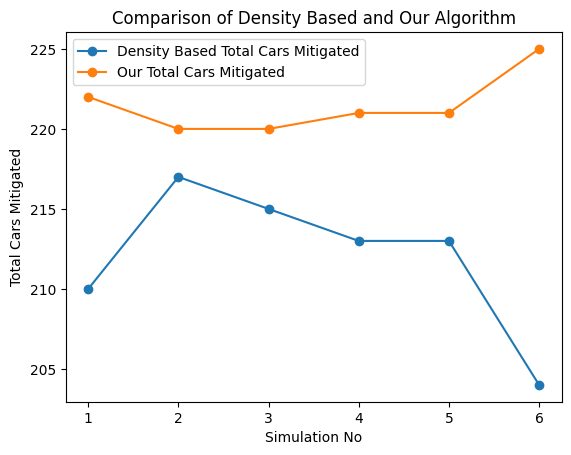

In [ ]:
import matplotlib.pyplot as plt

data.plot(x="Simulation No", y=["Density Based Total Cars Mitigated", "Our Total Cars Mitigated"], marker='o')
plt.xlabel("Simulation No")
plt.ylabel("Total Cars Mitigated")
plt.title("Comparison of Density Based and Our Algorithm")
plt.show()

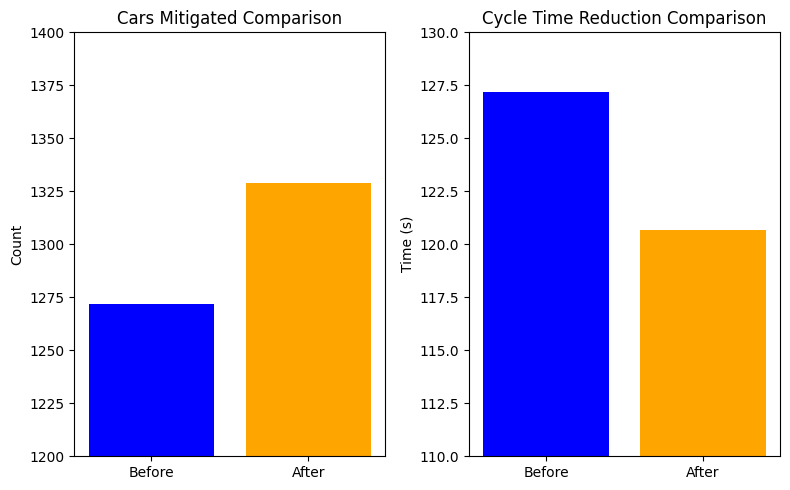

In [ ]:
import matplotlib.pyplot as plt

# Data
metrics = ['Before', 'After']
mitigated_values = [1272, 1329]
cycle_time_values = [127.2, 120.67]

# Plotting for Cars Mitigated
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.bar(metrics, mitigated_values, color=['blue', 'orange'])
plt.title('Cars Mitigated Comparison')
plt.ylabel('Count')
plt.ylim(1200, 1400)

# Plotting for Cycle Time Reduction
plt.subplot(1, 2, 2)
plt.bar(metrics, cycle_time_values, color=['blue', 'orange'])
plt.title('Cycle Time Reduction Comparison')
plt.ylabel('Time (s)')
plt.ylim(110, 130)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# For T Point (3-Way Intersection)

In [ ]:
main_road_right=50
main_road_straight=50
main_road_right_time=30
main_road_straight_time=30
main_road_total_time=60
main_road_total=100


# inter_1_right= does not exist only left
inter_1_left= 3
inter_1_left_time= 5
inter_1_straight= 9
inter_1_straight_time= 10
inter_1_total_time= 15
inter_1_total= 12

inter_2_right= 23
inter_2_left= 13
inter_2_right_time= 15.6
inter_2_left_time= 7.8
inter_2_total_time= 23.4
inter_2_total= 39


if main_road_straight>inter_1_straight:
    print("Main road straight green and intersection 1 green for ", inter_1_straight_time)
    print("Main road straight green and main road right green for ",main_road_straight_time-inter_1_straight_time+(main_road_right_time-(main_road_straight_time-inter_1_straight_time)))
    print("Intersection 2 road right green for ", inter_2_right_time)
else:
    print("Main road straight green and intersection 1 green for ", inter_1_straight_time)
    print("Main road straight green and main road right green for ",main_road_right_time)
    print("Intersection 2 road right green for ", inter_2_right_time)


Main road straight green and intersection 1 green for  10
Main road straight green and main road right green for  30
Intersection 2 road right green for  15.6


In [ ]:
def tj_intersection(main_road, intersecting_road1, intersecting_road2):
    min_cycle_duration = 60  # Minimum cycle duration in seconds
    max_cycle_duration = 300  # Maximum cycle duration in seconds
    min_green_time = 15  # Minimum green time for any road

    waiting_cars_main = main_road
    waiting_cars_intersect1 = intersecting_road1
    waiting_cars_intersect2 = intersecting_road2

    # Calculate total waiting cars
    total_waiting_cars = (
        waiting_cars_main + waiting_cars_intersect1 + waiting_cars_intersect2
    )

    if total_waiting_cars == 0:
        print("No cars waiting.")
    else:
        # Calculate cycle duration based on total waiting cars
        cycle_duration = max(
            min_cycle_duration,
            min(
                max_cycle_duration,
                (total_waiting_cars * min_cycle_duration) / 100  # Adjust this factor as needed
            )
        )

        # Calculate green light times for each road
        green_time_main = max(
            (waiting_cars_main / total_waiting_cars) * cycle_duration,
            min_green_time
        )
        green_time_intersect1 = max(
            (waiting_cars_intersect1 / total_waiting_cars) * cycle_duration,
            min_green_time
        )
        green_time_intersect2 = max(
            (waiting_cars_intersect2 / total_waiting_cars) * cycle_duration,
            min_green_time
        )
        return green_time_main, green_time_intersect1, green_time_intersect2, cycle_duration

# Output green light times
green_time_main, green_time_intersect1, green_time_intersect2, cycle_duration = tj_intersection(100, 12, 39)
print("Cycle Duration:", cycle_duration, "seconds")
print("Main Road Green Light for", green_time_main, "seconds")
print("Intersecting Road 1 Green Light for", green_time_intersect1, "seconds")
print("Intersecting Road 2 Green Light for", green_time_intersect2, "seconds")

Cycle Duration: 90.6 seconds
Main Road Green Light for 60.0 seconds
Intersecting Road 1 Green Light for 15 seconds
Intersecting Road 2 Green Light for 23.4 seconds
